## 02. Neural Network Classification with PyTorch

classification is a problem of predicting whether something is one thing or another(there can be multiple things)


### 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles

X, y = make_circles(n_samples, 
                    noise = 0.03,
                    random_state = 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"{X[:5]}\n")
print(f"{y[:5]}\n")

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

[1 1 1 1 0]



In [5]:
# Make a DataFrame of circle data

import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2":X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


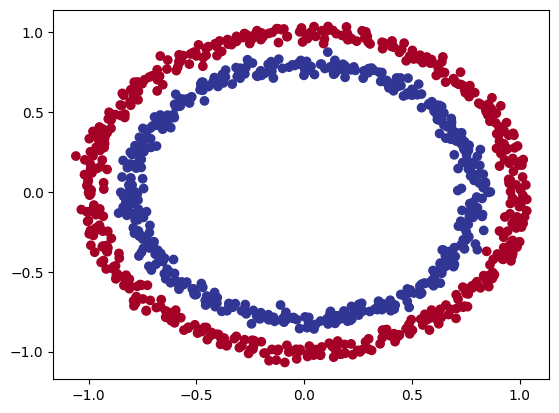

In [6]:
## Visualize, visualize, visualize

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y,
            cmap=plt.cm.RdYlBu);

Note: this data we are working with is often referred to as a toy dataset. 

https://scikit-learn.org/stable/datasets/toy_dataset.html

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of feautres and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X: (2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch
torch.__version__

'2.4.0+cu124'

In [10]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [12]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # 20 and 80% split
                                                    random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. setup device
2. construct a model
3. define a loss function and optimizer
4. create a training and test loop


In [13]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create `nn.Linear` layers that are capable of handling the shape of our data
3. Define a `forward()` method that outlines the forward pass of the models
4. Instanciate an instance of our model class and send it to the target device


In [14]:
X_train.shape

torch.Size([800, 2])

In [15]:
y_train.shape

torch.Size([800])

https://playground.tensorflow.org

In [16]:
# 1. Construct a model that subsclasses nn.Module

class CirlceModelV0(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        #2. Create a nn.Linear layers capable of handling the shape of our data (circles)
        # these layers should reflect the shapes of our Train and Test tensors
        # in_feature -> shape of X_train out_feature -> shape of y_train
        # this first layer is what we call hidden layer
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        #output layer
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 feature and return 1 feature

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2


# 4. Instantiate an instance of our model class and send it to the target device

model_0 = CirlceModelV0().to(device)
model_0


CirlceModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# check the device
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# Let's replicate the model above with nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0 # whith sequential you get information about sequence


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# change the first model to use sequential
class CirlceModelV0(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5), nn.Linear(in_features=5, out_features=1)        )
    def forward(self, x):
        return self.two_linear_layers(x)

model_0 = CirlceModelV0().to(device)
model_0


CirlceModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [20]:
model_0.state_dict() # this is going to be based on in_features and out features numbers 

OrderedDict([('two_linear_layers.0.weight',
              tensor([[-0.5514, -0.4541],
                      [ 0.1356, -0.5550],
                      [-0.1758,  0.2071],
                      [ 0.6042,  0.0525],
                      [-0.4839,  0.5226]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([ 0.2885, -0.2741,  0.3814, -0.2549,  0.2077], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[-0.4364, -0.4108, -0.2965,  0.4063, -0.0302]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([-0.0229], device='cuda:0'))])

In [21]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"First 10 predictions:\n{untrained_preds[:10]}, Shape: {untrained_preds.shape}")
print(f"Length of prediction: {len(X_test)}, shape: {X_test.shape}\n")

print(f"\nFirst 10 labels:\n{y_test[:10]}")

First 10 predictions:
tensor([[-0.1929],
        [ 0.1040],
        [-0.7251],
        [-0.0431],
        [-0.3345],
        [-0.1563],
        [ 0.3701],
        [ 0.3102],
        [-0.7408],
        [ 0.1282]], device='cuda:0'), Shape: torch.Size([200, 1])
Length of prediction: 200, shape: torch.Size([200, 2])


First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [22]:
# The prediction came back as decimals instead of 1 and 0 and different format/shape
# There are other steps that needs to be take in order to come up with our predictions to be covered later
# if we round our values however, we can see that our model will be 50% accurate as all zeros will be predicted. and this is pure random

print(f"First 10 predictions:\n{torch.round(untrained_preds[:10])}, Shape: {untrained_preds.shape}")
print(f"Length of prediction: {len(X_test)}, shape: {X_test.shape}\n")

print(f"\nFirst 10 labels:\n{y_test[:10]}")

First 10 predictions:
tensor([[-0.],
        [ 0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-1.],
        [ 0.]], device='cuda:0'), Shape: torch.Size([200, 1])
Length of prediction: 200, shape: torch.Size([200, 2])


First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 setup loss function and optimizer

Which loss function or optimizer should you use?

This is probless specific

For example for regression you might want MAE or MSE 

For classification you might want binary cross entropy or categorical cross entropy

And for optimizers, two of the most common and useful are SGD and Adam

* for the loss function we use `nn.BCEWithLogitsLoss` (https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss)
* for optimizer see `nn.optim`

In [23]:
# setup the loss function

loss_fn = nn.BCEWithLogitsLoss() # The sigmoid activation is built-in while the nn.BCELoss does not.

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

# Calculate accurancy -out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc




### 3. Train model

to train our model we're going to need to build a training loop:
1. forward pass
2. calculate the loss
3. Optimizer zero glad
4. loss backward (backpropagration)
5. optimizer step

#### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are to be raw **logits**

**logits** are raw outputs of our model

we can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g sigmoig for 
binary classification and softmax for multiclass classification)

The we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

In [24]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.1929],
        [ 0.1040],
        [-0.7251],
        [-0.0431],
        [-0.3345]], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# in order to compare logits to our test data for accuracy, they need to be all identical
# Let's use sigmoid
y_pred_probs = torch.sigmoid(y_logits) # this returns probability
y_pred_probs

tensor([[0.4519],
        [0.5260],
        [0.3263],
        [0.4892],
        [0.4171]], device='cuda:0')

In [27]:
torch.round(y_pred_probs)

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [28]:
# find prediction labels using round
y_preds = torch.round(y_pred_probs)

# In full

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check quality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and testing loop

In [29]:
# Building a prediction loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epoch
epochs = 20000

# Put data to device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test   = X_test.to(device), y_test.to(device)  
for epoch in range(epochs):

    # Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds  = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels 

    # 2. calculate the loss
    loss = loss_fn(y_logits, # expect raw logits as input
                    y_train)
    acc  = accuracy_fn(y_true=y_train,
                       y_pred=y_preds)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer  step
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds  = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc  = accuracy_fn(y_true=y_test,
                                y_pred=test_preds)
    # print out what's happenin'
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss 0.71772, Acc: 48.38% | Test loss: 0.73153, Test acc: 48.50%
Epoch: 1000 | Loss 0.69298, Acc: 51.12% | Test loss: 0.69469, Test acc: 46.00%
Epoch: 2000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 3000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 4000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 5000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 6000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 7000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 8000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 9000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 10000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 11000 | Loss 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 12000 | Loss 0.69298, Acc: 51.00% | Test loss:

## 4. Make predictions and evaluate the model

from the metrics it looks like our model is not learning
So to inspect let's visualize our model
In order words, visualize, visualize, visualize

to do so, we are going to import helper.py https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

In [30]:
import requests
from pathlib import Path
# Download helper function from Learn PyTorch repo

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists


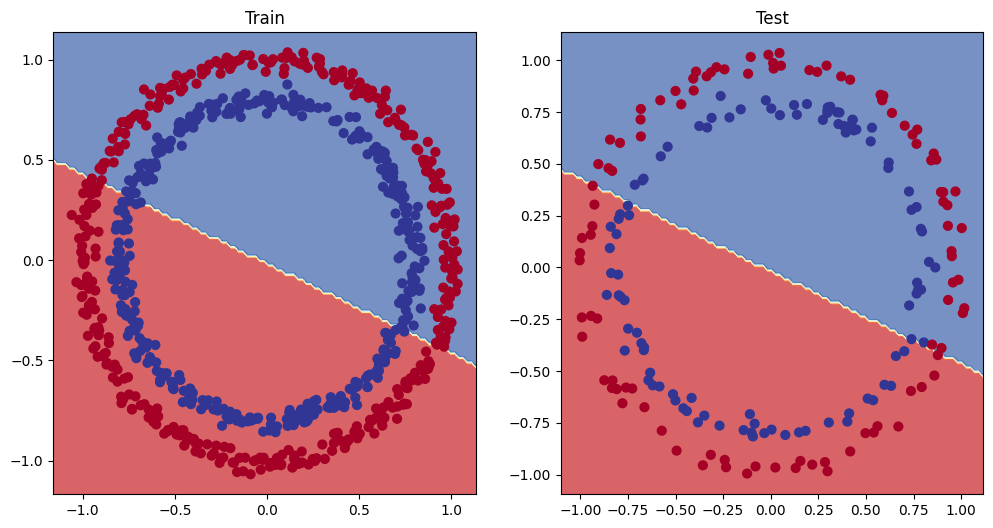

In [31]:
# Plot decision boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

from the visualization, it's impossobile to use a linear model on a circular data

## 5. Improving a model (from a model perspective)

* Add mode layers - give the model more changes to learn about patterns
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing learning rate
* Change the optimization function
* Change/add activation function

All these options deal directly with the model not the data

Because these options are all values we(machine learning engineers and data scientists) can change, they are referred as **hyperparameters**

* Let's improve our model by adding more units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [64]:
# change the first model to use sequential
class CirlceModelV1(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))
torch.manual_seed(42)
model_1 = CirlceModelV1().to(device)
model_1


CirlceModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [65]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [66]:
# setup the loss function

loss_fn = nn.BCEWithLogitsLoss() # The sigmoid activation is built-in while the nn.BCELoss does not.

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

# Calculate accurancy -out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [67]:
# Building a prediction loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epoch
epochs = 1000

# Put data to device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test   = X_test.to(device), y_test.to(device)  
for epoch in range(epochs):

    # Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_preds  = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels 

    # 2. calculate the loss
    loss = loss_fn(y_logits, # expect raw logits as input
                    y_train)
    acc  = accuracy_fn(y_true=y_train,
                       y_pred=y_preds)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer  step
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_preds  = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc  = accuracy_fn(y_true=y_test,
                                y_pred=test_preds)
    # print out what's happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss 0.52314, Acc: 50.88% | Test loss: 0.49859, Test acc: 50.00%
Epoch: 100 | Loss 0.49887, Acc: 50.00% | Test loss: 0.50449, Test acc: 50.00%
Epoch: 200 | Loss 0.49781, Acc: 50.25% | Test loss: 0.50884, Test acc: 50.00%
Epoch: 300 | Loss 0.49664, Acc: 50.25% | Test loss: 0.51359, Test acc: 50.00%
Epoch: 400 | Loss 0.49529, Acc: 50.25% | Test loss: 0.51909, Test acc: 50.00%
Epoch: 500 | Loss 0.49380, Acc: 50.00% | Test loss: 0.52522, Test acc: 50.00%
Epoch: 600 | Loss 0.49379, Acc: 50.38% | Test loss: 0.52524, Test acc: 50.00%
Epoch: 700 | Loss 0.49379, Acc: 50.62% | Test loss: 0.52523, Test acc: 50.00%
Epoch: 800 | Loss 0.49379, Acc: 50.00% | Test loss: 0.52527, Test acc: 50.00%
Epoch: 900 | Loss 0.49379, Acc: 50.62% | Test loss: 0.52524, Test acc: 50.00%


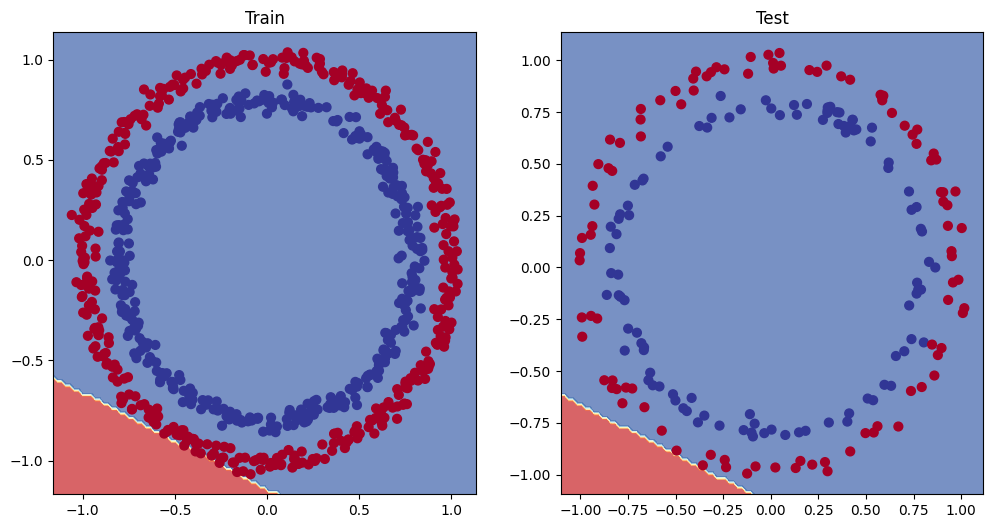

In [68]:
# Plot decision boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test our a smaller problem

In [37]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01


# create data
X_reg = torch.arange(start, end, step).unsqueeze(dim=1)
y_reg = weight* X_reg + bias
# check the data
print(len(X_reg)
)
X_reg[:5], y_reg[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [38]:
# Create train and test splits
test_split = int(0.8*len(X_reg))
X_train_reg, y_train_reg = X_reg[:test_split], y_reg[:test_split]
X_test_reg, y_test_reg = X_reg[test_split:], y_reg[test_split:]
len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

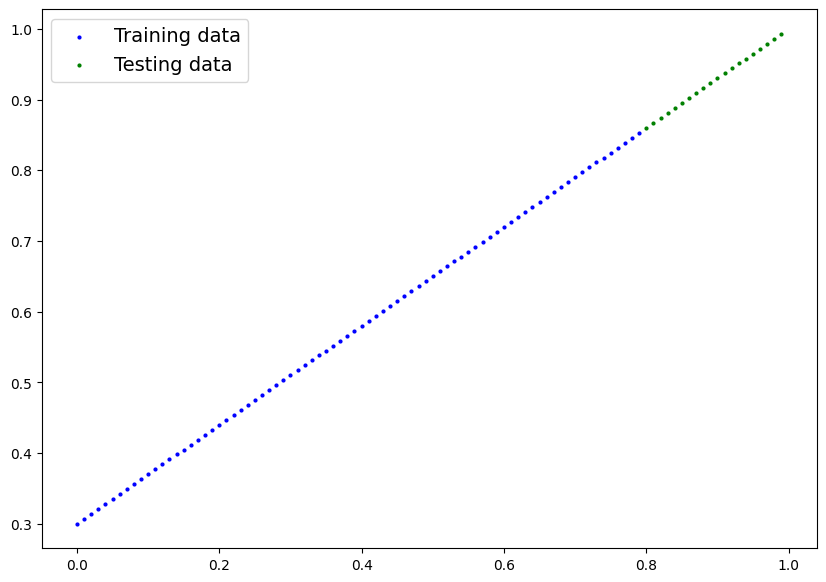

In [39]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg
                 )

### 5.2 Adjusting model_1 to fit a straight line


In [50]:
# Same architecture as model_1(but using nn.Sequential)

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=128),
    nn.Linear(in_features=128, out_features=128),
    nn.Linear(in_features=128, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=128, bias=True)
  (2): Linear(in_features=128, out_features=1, bias=True)
)

In [51]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)


In [61]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs

epochs = 10000

# Put the data on the target device
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_reg)
    loss = loss_fn(y_pred, y_train_reg)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing 
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_reg)
        test_loss = loss_fn(test_pred, y_test_reg)
    
    # Print out what's happening
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.5f} | Test loss :{test_loss:.5f}")

Epoch: 0 | loss: 0.00776 | Test loss :0.00457
Epoch: 1000 | loss: 0.00640 | Test loss :0.00447
Epoch: 2000 | loss: 0.00770 | Test loss :0.00790
Epoch: 3000 | loss: 0.00740 | Test loss :0.00064
Epoch: 4000 | loss: 0.00760 | Test loss :0.00082
Epoch: 5000 | loss: 0.00338 | Test loss :0.03565
Epoch: 6000 | loss: 0.00146 | Test loss :0.03363
Epoch: 7000 | loss: 0.00899 | Test loss :0.00077
Epoch: 8000 | loss: 0.00888 | Test loss :0.00521
Epoch: 9000 | loss: 0.00666 | Test loss :0.00262


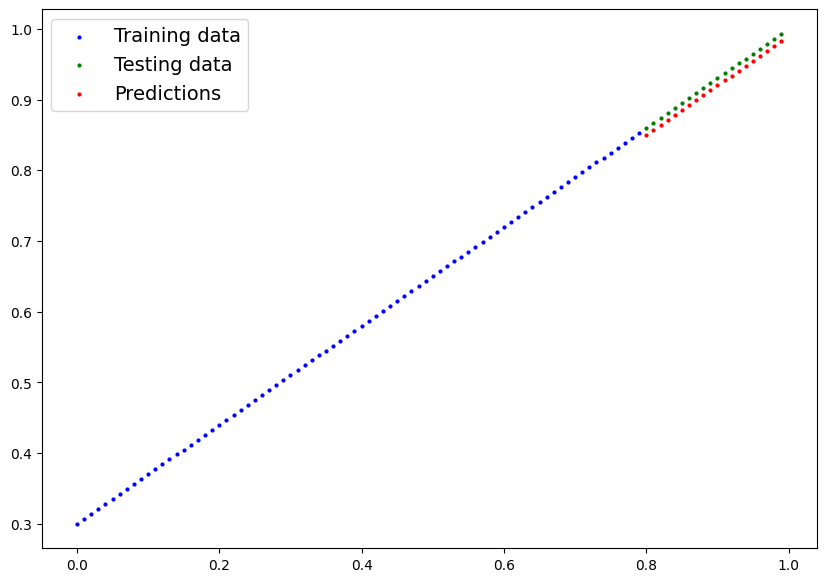

In [62]:
# Turn on evaluation mode

model_2.eval()

# Make predictions (inference)

with torch.inference_mode():
    y_preds = model_2(X_test_reg)

# Plot data and predictions
plot_predictions(train_data=X_train_reg.cpu(), train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(), test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())